In [28]:
import networkx as nx
import random as r
import matplotlib.pyplot as plt
import numpy as np

from networkx.algorithms.assortativity import neighbor_degree


# 이웃 노드 튜플 얻는 방법 테스트

In [31]:
# 주위 이웃노드 얻는 방법 테스트 

lattice = nx.triangular_lattice_graph(m=10, n=20, periodic=False, with_positions=True, create_using=None)

nx.set_node_attributes(G=lattice,
                       values = {(i,j):{'occupied':0} for i in range(l) for j in range(l)})

center = (l//2-1, l//2-1)
center

(9, 9)

In [ ]:
# total이 뭐였더라?
# for k,res in total.items():
#   print(f'time : {k} ,size : {len(list(res))}')

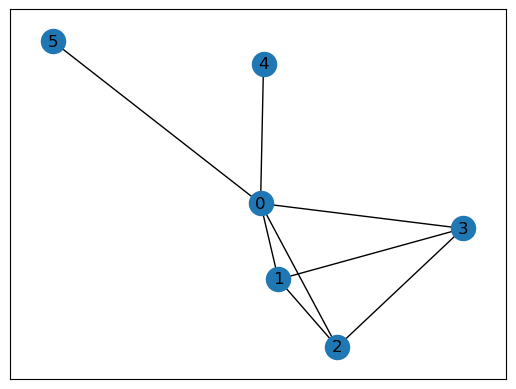

In [25]:
# 센터 노드에서 어떻게 원형으로만 남기고 나머지 지울지?
import networkx as nx
from matplotlib import pylab as pl

G = nx.karate_club_graph()
res = [0,1,2,3,4,5, 'parrot'] #I've added 'parrot', a node that's not in G
                              #just to demonstrate that G.subgraph is okay
                              #with nodes not in G.    
pos = nx.spring_layout(G)  #setting the positions with respect to G, not k.
k = G.subgraph(res)  

pl.figure()

nx.draw_networkx(k, pos=pos)

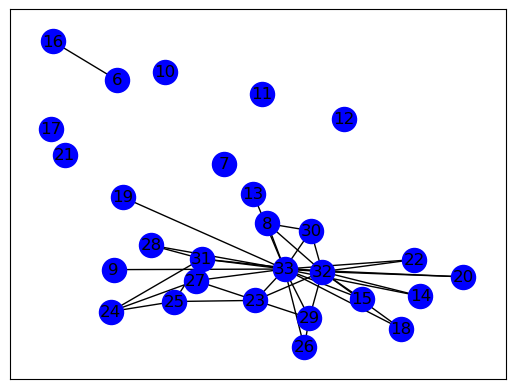

In [26]:
# 원형에 해당하는 node_list 를 얻어 올 수 있다면 subgraphfh gownf tn dlTek.


othersubgraph = G.subgraph(range(6,G.order()))
nx.draw_networkx(othersubgraph, pos=pos, node_color = 'b')
pl.show()

# 모듈화 (함수화)

In [29]:
def make_lattice(l,m):
  lattice = nx.triangular_lattice_graph(m=l, n=m, periodic=False, with_positions=True, create_using=None)
  pos = nx.get_node_attributes(lattice, 'pos')
  return lattice, pos

In [30]:
# l+1xl+1 크기를 하고 싶으면 생각을 잘해야된다
l = 20
m = 40
G, pos = make_lattice(l,m)

In [31]:
def get_neighbors_set(tuple_set):
    
    if isinstance(tuple_set,tuple):
        x,y = tuple_set
        if y % 2 == 0:
            t_set = set([(x-1,y),(x+1,y),(x,y-1),(x,y+1),(x-1, y-1),(x-1,y+1)])
        else:
            t_set = set([(x-1,y),(x+1,y),(x,y-1),(x,y+1),(x+1, y+1),(x+1,y-1)])
        
        return t_set
    
    
    tuple_list = list(tuple_set)
    
    neighbors = []
    for x,y in tuple_list:
        if y % 2 == 0:
            neighbors.extend([(x-1,y),(x+1,y),(x,y-1),(x,y+1),(x-1, y-1),(x-1,y+1)])
        else:
            neighbors.extend([(x-1,y),(x+1,y),(x,y-1),(x,y+1),(x+1, y+1),(x+1,y-1)])
    return set(neighbors)

In [32]:
# 0 을 q의 확률로 고른다  1을 1-q의 확률로 고른다
q = 0.9
np.random.choice([0,1], p=[q,1-q])

1

# Eden model gif

In [33]:
import random

def sequence_neighbor(lattice,n, seed_number):

  nx.set_node_attributes(G=lattice,
                       values = {(i,j):{'occupied':0} for i,j in G.nodes})

  center = (l//2, l//2)
  

  lattice.nodes[center]['occupied'] = 1

  neighbors = get_neighbors_set(center)
  step =0
  occupied_set = set()
  occupied_list = []
  occupied_list.append(center)
  while(step < n):
    # select point
    selected_neighbor = r.choice(tuple(neighbors))
    
    # update state
    lattice.nodes[selected_neighbor]['occupied'] = 1
    
    # print(f'selected : {selected_neighbor} -> {get_neighbors_set(selected_neighbor)}')
    
    # update set of ocuupied nodes ""
    occupied_set.add(selected_neighbor)
    occupied_list.append(selected_neighbor)
    # update possible neighbors
    neighbors = get_neighbors_set(occupied_set) - set(occupied_set)
    # print(f'updated neighbors : {neighbors}')

    step += 1
  return occupied_list

In [34]:
path = '../data/Figure/eden/'

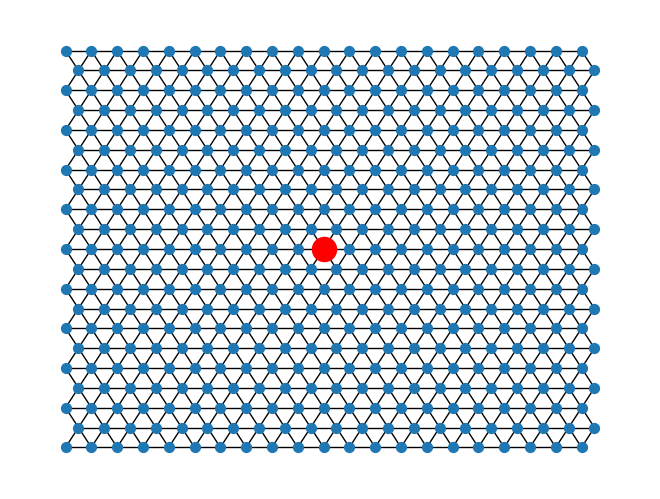

In [35]:
p_list = []
j = 0
# 순서대로 어떤 것을 plaque로 통합 할지에 대해서 나오는다
plaque = sequence_neighbor(G,10,0)

for i in plaque:
  p_list.append(i)
  plt.figure()
  nx.draw(G,pos, node_size=50)
  nx.draw_networkx_nodes(G,pos,nodelist=p_list,node_color='red')
  j += 1
  plt.savefig(path + f'eden_model{j}.png')
  plt.show()
  break

In [63]:
import imageio
import os
import natsort

path = '../data/Figure/eden/'
file_list = os.listdir(path)

file_list_png = [file for file in file_list if file.endswith(".png")]
file_list_png = natsort.natsorted(file_list_png)

In [45]:
directory = '../data/Figure/eden/'
image_type = '.png'
gif_name = 'output'
speed_sec = { 'duration': 0.2 } #사진 넘기는 시간

images = []

for file in file_list_png:
  file_path = os.path.join(directory, file)
  images.append(imageio.imread(file_path))

/var/folders/7w/f3yz5lls31n4jsq13_dmd6z40000gn/T/ipykernel_53121/623460346.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))


In [46]:
imageio.mimsave('{0}/{1}.gif'.format(directory, gif_name), images, **speed_sec)